# Marginal Stability Vehicle Sizing
This sheet uses <code>numpy, matplotlib, and simulations</code>.

<code>simulations</code> is developed and maintained (no promises) by Cameron. The current version of the code is 0.0.1 and can be downloaded from github [here](https://github.com/cmflannery/simulations). The source-code is not currently on pip.

In [1]:
import simulations as sim
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_alt(fig):
    # plot altitude
    ax1 = fig.add_subplot(3,1,1)
    ax1.xaxis.grid(linewidth=1.0)
    ax1.yaxis.grid(linewidth=1.0)
    ax1.grid(True, linewidth=1)
    ax1.plot(time,kmaltitude)
    ax1.set_ylabel('Altitude (km)')

    ax1.set_title('Altitude and Velocity')

    # plot velocity
    kmVel = [x/1000 for x in velocity]
    ax2 = fig.add_subplot(3,1,2)
    ax2.xaxis.grid(linewidth=1.0)
    ax2.yaxis.grid(linewidth=1.0)
    ax2.grid(True, linewidth=1)
    ax2.plot(time,kmVel)
    ax2.set_ylabel('Velocity (km/s)')

    # plot acceleration
    gees = [x/g0 for x in acceleration]
    ax2 = fig.add_subplot(3,1,3)
    ax2.xaxis.grid(linewidth=1.0)
    ax2.yaxis.grid(linewidth=1.0)
    ax2.grid(True, linewidth=1)
    ax2.plot(time,gees)
    ax2.set_ylabel('Acceleration (gees)')
    
def plot_thrust(fig):
    # plot thrust
    ax = fig.add_subplot(2,1,1)
    ax.xaxis.grid(linewidth=1.0)
    ax.yaxis.grid(linewidth=1.0)
    ax.grid(True, linewidth=1)
    ax.plot(time,thrust)
    ax.set_ylabel('Thrust (N)')
    
    ax.set_title('Thrust and Drag')
    
    # plot drag
    ax1 = fig.add_subplot(2,1,2)
    ax1.xaxis.grid(linewidth=1.0)
    ax1.yaxis.grid(linewidth=1.0)
    ax1.grid(True, linewidth=1)
    ax1.plot(time,drag)
    ax1.set_ylabel('Drag (N)')
    ax1.set_ylim(0,2e5)

In [3]:
burntime = 50  # s

nengines = 1
thrust_sl = 24000
Isp = 400
g0 = 9.81
mdot = nengines*thrust_sl/(g0*Isp)
twratio = 50  # estimated thrust 2 weight ratio

mstructure = 300  # kg
mpropulsion = thrust_sl/(twratio*g0)
mpropellant = mdot*burntime
mass = mpropulsion + mpropellant + mstructure

initialConditions = {
    'time': 0,
    'velocity': 0,
    'flight_angle': 0,
    'flight_heading': np.deg2rad(90),
    'latitude': 0,
    'longitude': 0,
    'altitude': 0,
    'mass': mass,
    'heat': 0,
    'lift_coefficient': 0,
    'bank_angle': 0
}

engines = {
    'thrust_sl': thrust_sl,
    'thrust_angle': 0,
    'Isp': Isp,
    'Ae': 0.25,
    'nengines': nengines
}

In [4]:
itsatest = sim.Rocket(initialConditions, engines, burntime)
altitude, velocity, acceleration, mass, time, thrust = itsatest.run()

Apogee = 279 km


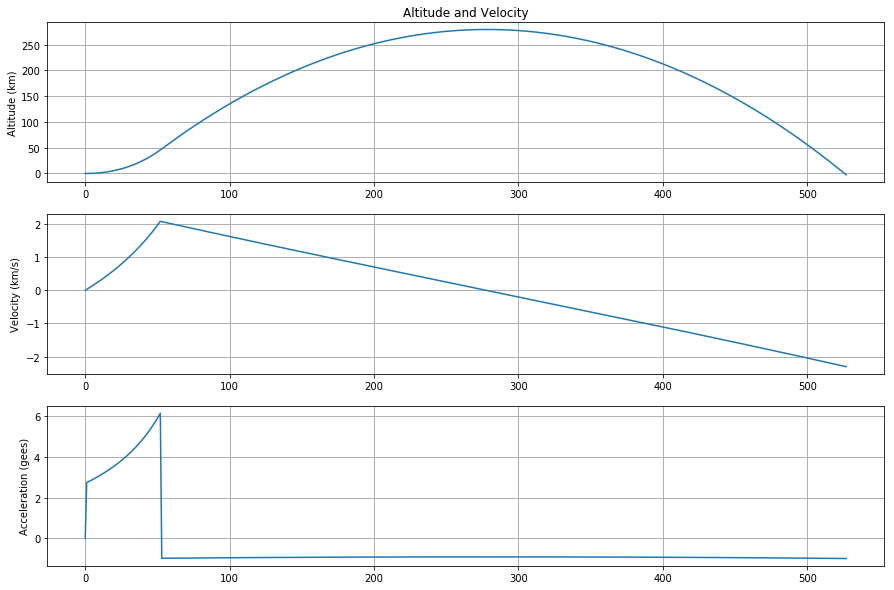

In [5]:
kmaltitude = [x/1000 for x in altitude]
print('Apogee = %d km' % max(kmaltitude))

fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.2)

# fig2 = plt.figure(figsize=(15,10))
# fig2.subplots_adjust(hspace=0.2)

plot_alt(fig)
plt.show()

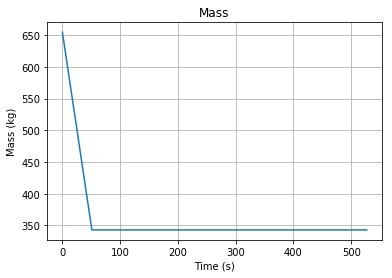

In [6]:
plt.plot(time,mass)
plt.title('Mass')
plt.xlabel('Time (s)')
plt.ylabel('Mass (kg)')
plt.grid()
plt.show()